In [3]:
# Importing the required libraries that we are going to use:
import re
import pandas as pd
import numpy as np
import requests
import os
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
%matplotlib inline

# Data Gathering 

In [4]:
# (Using Pandas) Reading data from twitter-archive-enhanced.csv file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# (Using Requests) Reading data from https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = url.split('/')[-1]
with open("image-predictions.tsv", "w") as file:
    file.write(response.text)
url_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# (Using tweety api) Reading data from tweety api in tweet_json.txt

In [15]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [16]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [17]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

In [18]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [6]:
df_list = []
with open('tweet_json.txt') as file:
    for data in file:
        line = json.loads(data)
        df_list.append({'tweet_id':line['id'],
                        'favorite_count':line['favorite_count'],
                        'retweet_count':line['retweet_count'],
                        'followers_count':line['user']['followers_count']})
api_df = pd.DataFrame(df_list)
api_df

,tweet_id,favorite_count,retweet_count,followers_count
0,892420643555336193,35283,7445,8931073
1,892177421306343426,30524,5531,8931073
2,891815181378084864,22956,3654,8931073
3,891689557279858688,38568,7616,8931073
4,891327558926688256,36838,8204,8931073
...,...,...,...,...
2325,666049248165822465,95,39,8931101
2326,666044226329800704,263,123,8931101
2327,666033412701032449,108,39,8931101
2328,666029285002620928,118,41,8931101


# Data Assessment

In [5]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
sum(archive_df['tweet_id'].duplicated())

0

In [7]:
archive_df[archive_df['rating_denominator'] > 10].rating_denominator

342      15
433      70
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
Name: rating_denominator, dtype: int64

In [8]:
archive_df[archive_df['name'] == 'None'].name.count()

745

In [9]:
archive_df.loc[(archive_df.name.str.islower()), 'name'].count()

109

In [10]:
archive_df[archive_df['puppo'] == 'None'].name.count()

2326

In [11]:
archive_df[archive_df['pupper'] == 'None'].name.count()

2099

In [12]:
archive_df[archive_df['floofer'] == 'None'].name.count()

2346

In [13]:
archive_df[archive_df['doggo'] == 'None'].name.count()

2259

In [14]:
archive_df.loc[(archive_df.doggo == 'None') & (archive_df.puppo == 'None') & (archive_df.floofer == 'None') & (archive_df.pupper == 'None')].tweet_id.count()

1976

## twitter-archive-enhanced

<h5>Quality</h5>
<ul>
<li>Missing values:-</li>
    <ul>
        <li> Null values in (in_reply_to_status_id and in_reply_to_user_id) columns are 2278</li>
        <li> Null values in (retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) columns are 2175</li>
        <li>Null values in "expanded_urls" column is 59</li>
    </ul>

<li>"text" column contains hyper links of tweet</li>

<li>"rating_denominator" column contains 20 invalid values greater than 10</li>

<li>"name" column contains 745 row with "None" values and other with not valid names like ('a','the', 'an')</li>

<li>(doggo,floofer,pupper,puppo) columns contains many of "None" values (2259, 2346, 2099, 2326)</li>

<li>Timestamp and retweeted_status_timestamp columns stored as object not datetime format
</ul>

<h5>Tidiness</h5>
<ul>
<li>"expanded_urls" column contains many links of images</li>
<li>"source" column contains html tags</li>
<li>(doggo,floofer,pupper,puppo) columns should be in only one column dog_stage</li>
<li>"rating_numerator" and rating_denominator should be in one column contains the final rating</li>
</ul>

In [15]:
url_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
url_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
url_df[(url_df['p1_dog'] == False) & (url_df['p2_dog'] == False) & (url_df['p3_dog'] == False)].tweet_id.count()

324

In [18]:
sum(url_df['jpg_url'].duplicated())

66

## image-predictions

<h5>Quality</h5>
<ul>
<li>Names of (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) columns are not descriptive</li>
<li>Data in (p1, p2, p3) columns contain small letters and under scores</li>
<li>Data in 324 rows arenot related to images of dogs</li>
<li>Name of "jpg_url" column is not descriptive</li> 
</ul>

<h5>Tidiness</h5>
<ul>
<li>Columns of (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) should be restructured in 2 columns only (confidence_rate and dog_type)</li>
<li>Column "img_num" is meaningless after merging (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) columns in 2 columns</li>
</ul>

## twitter_archive_master

<h5>After merging the three dataframes in "twitter_archive_master" dataframe:</h5>
<p> # 428 rows donnot have image_url in "image-prediction" dataframe</p>

# Cleaning Data

## Define
<h6> twitter-archive-enhanced </h6>
<ul>
<li>Drop rows of (in_reply_to_status_id and retweeted_status_id) because there is no need for retweets and replies</li>
<li>Drop  (in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_user_id) columns</li>
<li>Drop rows with no values in expanded_urls column</li>
<li>Add new column "tweet_url" to sort tweet shorten link from text column</li>
<li>Remove URL from "text" column</li>
<li>Drop "expanded_urls" column and use the original link of tweet from text column instead of it</li>
<li>Extract text from "a" tag in "source" column</li>
<li>Change timestamp column data type from object to datetime</li>
<li>Add new column "final_rating" to store the rate of (rating_numerator / rating_denominator) as "rating_denominator" column contains 20 rows with invalid values greater than 10</li>
<li>Drop "rating_numerator" and "rating_denominator" columns after adding "final_rating" column</li>
<li>Clean values in column name which contains words with lower case like (a, an, the, this) </li>
<li>Change column "name" to "dog_name" to be more descriptive </li>
<li>Merge values in (doggo,floofer,pupper,puppo) columns in one column "dog_stage"</li>
<li>Adding underscors in between for ('doggopuppo','doggofloofer',doggopupper) values </li>
<li>Drop (doggo,floofer,pupper,puppo) columns</li>
</ul>

### Code

In [9]:
# copys of original dataframes
copy_archive_df = archive_df.copy()
copy_url_df = url_df.copy()
copy_api_df = api_df.copy()

<ul>
<li>Drop rows of (in_reply_to_status_id and retweeted_status_id) because there is no need for retweets and replies</li>
<li>Drop  (in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_user_id) columns</li>
</ul>

In [10]:
copy_archive_df = copy_archive_df[(copy_archive_df['in_reply_to_status_id'].isnull()) & (copy_archive_df['retweeted_status_id'].isnull())]

In [11]:
copy_archive_df = copy_archive_df.drop([
    'in_reply_to_status_id',
    'in_reply_to_user_id',
    'retweeted_status_id',
    'retweeted_status_user_id',
    'retweeted_status_timestamp',
], axis=1)

### Test

In [12]:
copy_archive_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Code

<ul><li>Drop rows with no values in expanded_urls column</li></ul>

In [13]:
copy_archive_df = copy_archive_df[(copy_archive_df['expanded_urls'].notnull())]

### Test

In [14]:
copy_archive_df[(copy_archive_df['expanded_urls'].isnull())]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Code

<ul><li>Add new column "tweet_url" to sort tweet shorten link from text column</li></ul>

In [15]:
copy_archive_df['tweet_url'] = 'https'+copy_archive_df['text'].str.strip().str.split('https', expand=True)[1]

### Test

In [16]:
copy_archive_df['tweet_url']

0       https://t.co/MgUWQ76dJU
1       https://t.co/0Xxu71qeIV
2       https://t.co/wUnZnhtVJB
3       https://t.co/tD36da7qLQ
4       https://t.co/AtUZn91f7f
                 ...           
2351    https://t.co/4B7cOc1EDq
2352    https://t.co/DWnyCjf2mx
2353    https://t.co/y671yMhoiR
2354    https://t.co/r7mOb2m0UI
2355    https://t.co/BLDqew2Ijj
Name: tweet_url, Length: 2094, dtype: object

### Code

<ul><li>Remove URL from "text" column</li></ul>

In [17]:
copy_archive_df['text'] = copy_archive_df['text'].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")

### Test

In [18]:
copy_archive_df['text'].str.strip().str.split(' ', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,This,is,Phineas.,He's,a,mystical,boy.,Only,ever,appears,...,None,None,None,None,None,None,None,None,None,None
1,This,is,Tilly.,She's,just,checking,pup,on,you.,Hopes,...,"pats,","snugs,","boops,",the,whole,bit.,13/10,None,None,None
2,This,is,Archie.,He,is,a,rare,Norwegian,Pouncing,Corgo.,...,when,one,may,strike.,12/10,None,None,None,None,None
3,This,is,Darla.,She,commenced,a,snooze,mid,meal.,13/10,...,None,None,None,None,None,None,None,None,None,None
4,This,is,Franklin.,He,would,like,you,to,stop,calling,...,and,should,be,respected,as,such.,12/10,#BarkWeek,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,Here,we,have,a,1949,1st,generation,vulpix.,Enjoys,sweat,...,None,None,None,None,None,None,None,None,None,None
2352,This,is,a,purebred,Piers,Morgan.,Loves,to,Netflix,and,...,the,iron.,6/10,None,None,None,None,None,None,None
2353,Here,is,a,very,happy,pup.,Big,fan,of,well-maintained,...,cuddle,af,None,None,None,None,None,None,None,None
2354,This,is,a,western,brown,Mitsubishi,terrier.,Upset,about,leaf.,...,shit,out,of,None,None,None,None,None,None,None


### Code

<ul><li>Drop "expanded_urls" column and use the original link of tweet from text column instead of it</li></ul>

In [19]:
copy_archive_df = copy_archive_df.drop([
    'expanded_urls',
], axis=1)

### Test

In [20]:
copy_archive_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,https://t.co/AtUZn91f7f
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None,https://t.co/4B7cOc1EDq
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None,https://t.co/DWnyCjf2mx
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None,https://t.co/y671yMhoiR
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None,https://t.co/r7mOb2m0UI


### Code

<ul><li>Extract text from "a" tag in "source" column</li></ul>

In [21]:
copy_archive_df['source'] = copy_archive_df['source'].str.split('>', expand=True)[1].str.replace('</a','')

### Test

In [22]:
copy_archive_df['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2094, dtype: object

### Code

<ul><li>Change timestamp column data type from object to datetime</li></ul>

In [23]:
copy_archive_df['timestamp'] = pd.to_datetime(copy_archive_df['timestamp'], infer_datetime_format=True)

### Test

In [24]:
copy_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2094 non-null   int64         
 1   timestamp           2094 non-null   datetime64[ns]
 2   source              2094 non-null   object        
 3   text                2094 non-null   object        
 4   rating_numerator    2094 non-null   int64         
 5   rating_denominator  2094 non-null   int64         
 6   name                2094 non-null   object        
 7   doggo               2094 non-null   object        
 8   floofer             2094 non-null   object        
 9   pupper              2094 non-null   object        
 10  puppo               2094 non-null   object        
 11  tweet_url           2094 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.7+ KB


In [25]:
copy_archive_df['timestamp'].dt.date

0       2017-08-01
1       2017-08-01
2       2017-07-31
3       2017-07-30
4       2017-07-29
           ...    
2351    2015-11-16
2352    2015-11-16
2353    2015-11-15
2354    2015-11-15
2355    2015-11-15
Name: timestamp, Length: 2094, dtype: object

### Code

<ul><li>Add new column "final_rating" to store the rate of (rating_numerator / rating_denominator) as "rating_denominator" column contains 20 rows with invalid values greater than 10</li></ul>

In [26]:
copy_archive_df.loc[copy_archive_df['rating_denominator'] > 10, ['tweet_url', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_url,text,rating_numerator,rating_denominator
433,https://t.co/NIYC820tmd,The floofs have been released I repeat the flo...,84,70
902,https://t.co/HmwrdfEfUE,Why does this never happen at my front door......,165,150
1068,https://t.co/XAVDNDaVgQ,"After so many requests, this is Bretagne. She ...",9,11
1120,https://t.co/yGQI3He3xv,Say hello to this unbelievably well behaved sq...,204,170
1165,https://t.co/eV1diwds8a,Happy 4/20 from the squad! 13/10 for all,4,20
1202,https://t.co/Kky1DPG4iq,This is Bluebert. He just saw that both #Final...,50,50
1228,https://t.co/mpvaVxKmc1,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,https://t.co/0eb7R1Om12,Here's a brigade of puppers. All look very pre...,80,80
1274,https://t.co/sedre1ivTK,"From left to right:\nCletus, Jerome, Alejandro...",45,50
1351,https://t.co/9dpcw6MdWa,Here is a whole flock of puppers. 60/50 I'll ...,60,50


In [27]:
copy_archive_df['final_rating'] = 10 * (copy_archive_df['rating_numerator'] / copy_archive_df['rating_denominator']).astype(float)

### Test

In [28]:
copy_archive_df['final_rating'].sample(20)

138     13.0
172     13.0
1430     8.0
150     13.0
2101     8.0
787     10.0
1910    10.0
854     10.0
304     12.0
699     12.0
1322    11.0
110     14.0
1800    11.0
1212    10.0
801     10.0
1775    12.0
1286    12.0
975     13.0
471     12.0
1818    11.0
Name: final_rating, dtype: float64

### Code

<ul><li>Drop "rating_numerator" and "rating_denominator" columns after adding "final_rating" column</li></ul>

In [29]:
copy_archive_df = copy_archive_df.drop([
    'rating_numerator',
    'rating_denominator',
], axis=1)

### Test

In [30]:
copy_archive_df.head()

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,tweet_url,final_rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU,13.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV,13.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,https://t.co/wUnZnhtVJB,12.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,https://t.co/tD36da7qLQ,13.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,https://t.co/AtUZn91f7f,12.0


### Code

<ul><li>Clean values in column name which contains words with lower case like (a, an, the, this) </li></ul>

In [31]:
copy_archive_df.loc[(copy_archive_df.name.str.islower()), 'name']

22       such
56          a
169     quite
193     quite
335       not
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 104, dtype: object

In [32]:
copy_archive_df.loc[(copy_archive_df.name == 'None'), 'name']

5       None
7       None
12      None
24      None
25      None
        ... 
2342    None
2343    None
2344    None
2351    None
2355    None
Name: name, Length: 600, dtype: object

In [33]:
copy_archive_df.loc[(copy_archive_df.name.str.islower()), 'name'] = 'None'
copy_archive_df.name.replace('None', np.nan, inplace= True)

### Test

In [34]:
copy_archive_df.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2094, dtype: object

### Code

<ul><li>Change column "name" to "dog_name" to be more descriptive </li></ul>

In [37]:
copy_archive_df.rename(columns={'name': 'dog_name'}, inplace= True)

### Test

In [38]:
copy_archive_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo', 'tweet_url', 'final_rating'],
      dtype='object')

### Code

<ul><li>Merge (doggo,floofer,pupper,puppo) columns in one column "dog_stage"</li></ul>

In [39]:
# replace None with ""
copy_archive_df.loc[(copy_archive_df.doggo == 'None'), 'doggo'] = ''
copy_archive_df.loc[(copy_archive_df.floofer == 'None'), 'floofer'] = ''
copy_archive_df.loc[(copy_archive_df.pupper == 'None'), 'pupper'] = ''
copy_archive_df.loc[(copy_archive_df.puppo == 'None'), 'puppo'] = ''

In [40]:
copy_archive_df.loc[(copy_archive_df.doggo != ''), 'doggo'].count()

83

In [41]:
copy_archive_df.loc[(copy_archive_df.floofer != ''), 'floofer'].count()

10

In [42]:
copy_archive_df.loc[(copy_archive_df.pupper != ''), 'pupper'].count()

229

In [43]:
copy_archive_df.loc[(copy_archive_df.puppo != ''), 'puppo'].count()

24

In [44]:
copy_archive_df['dog_breed'] = (copy_archive_df.doggo + copy_archive_df.puppo + copy_archive_df.floofer + copy_archive_df.pupper)

In [45]:
copy_archive_df.dog_breed.replace('', np.nan, inplace= True)

### Test

In [46]:
copy_archive_df.dog_breed.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

### Code

<ul><li>Adding underscors in between for ('doggopuppo','doggofloofer',doggopupper) values </li><ul>

In [47]:
# update values
copy_archive_df.dog_breed.replace('doggopuppo', 'doggo_puppo', inplace= True)
copy_archive_df.dog_breed.replace('doggofloofer', 'doggo_floofer', inplace= True)
copy_archive_df.dog_breed.replace('doggopupper', 'doggo_pupper', inplace= True)

### Test

In [48]:
copy_archive_df.dog_breed.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo_puppo',
       'doggo_floofer', 'doggo_pupper'], dtype=object)

### Code

<ul><li>Drop (doggo,floofer,pupper,puppo) columns</li></ul>

In [49]:
# drop (doggo,floofer,pupper,puppo) columns
copy_archive_df = copy_archive_df.drop([
    'doggo','pupper',
    'floofer','puppo',
], axis=1)

### Test

In [53]:
copy_archive_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'dog_name', 'tweet_url',
       'final_rating', 'dog_breed'],
      dtype='object')

## Define
<h6>image-predictions</h6>
<ul>
<li>Remove image prediction rows which donnot have dogs images</li>
<li>Add new column "confidence_rate" contains the highest prediction score of dog images</li>
<li>Add new column "dog_type" contains dog type of the highest prediction score stored in "confidence_rate" column </li>
<li>Drop (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) columns after adding "confidence_rate" and "dog_type" columns </li>
<li>Drop "img_num" column after adding "confidence_rate" and "dog_type" columns</li>
<li>Change "jpg_url" column name to "image_url" to be more descriptive</li>
</ul>
    

### Code

<ul><li>Remove image prediction rows which donnot have dogs images</li></ul>

In [70]:
copy_url_df[(copy_url_df['p1_dog'] == False) & (copy_url_df['p2_dog'] == False) & (copy_url_df['p3_dog'] == False)].tweet_id.count()

0

In [71]:
copy_url_df = copy_url_df[(copy_url_df['p1_dog'] == True) | (copy_url_df['p2_dog'] == True) | (copy_url_df['p3_dog'] == True)]

### Test

In [72]:
copy_url_df[(copy_url_df['p1_dog'] == False) & (copy_url_df['p2_dog'] == False) & (copy_url_df['p3_dog'] == False)].tweet_id.count()

0

### Code

<ul><li>Add new column "confidence_rate" contains the highest prediction score of dog images</li></ul>

In [73]:
def get_confidence(row):
    lst = []
    if row.p1_dog:
        lst.append(row.p1_conf)
    if row.p2_dog:
        lst.append(row.p2_conf) 
    if row.p3_dog:
        lst.append(row.p3_conf) 
    result = max(lst)    
    return result

copy_url_df['confidence_rate'] = copy_url_df.apply(lambda row: get_confidence(row), axis=1)

### Test

In [74]:
copy_url_df['confidence_rate']

0       0.465074
1       0.506826
2       0.596461
3       0.408143
4       0.560311
          ...   
2069    0.425595
2070    0.555712
2071    0.168086
2072    0.716012
2073    0.323581
Name: confidence_rate, Length: 1751, dtype: float64

### Code

<ul><li>Add new column "dog_type" contains dog type of the highest prediction score stored in "confidence_rate" column </li></ul>

In [75]:
def get_dog_type(row):
    dog_type = ''
    if row.p1_conf == row.confidence_rate:
        dog_type = row.p1
    if row.p2_conf == row.confidence_rate:
        dog_type = row.p2
    if row.p3_conf == row.confidence_rate:
        dog_type = row.p3
    return dog_type.title()

copy_url_df['dog_type'] = copy_url_df.apply(lambda row: get_dog_type(row), axis=1)

### Test

In [76]:
copy_url_df['dog_type']

0         Welsh_Springer_Spaniel
1                        Redbone
2                German_Shepherd
3            Rhodesian_Ridgeback
4             Miniature_Pinscher
                  ...           
2069    Chesapeake_Bay_Retriever
2070                      Basset
2071          Labrador_Retriever
2072                   Chihuahua
2073                   Chihuahua
Name: dog_type, Length: 1751, dtype: object

### Code

<ul><li>Drop (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) columns after adding "confidence_rate" and "dog_type" columns </li></ul>

In [77]:
copy_url_df = copy_url_df.drop([
    'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'
], axis=1)

### Test

In [78]:
copy_url_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   int64  
 1   image_url        1751 non-null   object 
 2   img_num          1751 non-null   int64  
 3   confidence_rate  1751 non-null   float64
 4   dog_type         1751 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 82.1+ KB


### Code

<ul><li>Drop "img_num" column after adding "confidence_rate" and "dog_type" columns</li></ul>

In [79]:
copy_url_df = copy_url_df.drop([
    'img_num',
], axis=1)

### Test

In [80]:
copy_url_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   int64  
 1   image_url        1751 non-null   object 
 2   confidence_rate  1751 non-null   float64
 3   dog_type         1751 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 68.4+ KB


### Code

<ul><li>Change "jpg_url" column name to "image_url" to be more descriptive</li></ul>

In [81]:
copy_url_df.rename(columns={'jpg_url': 'image_url'}, inplace= True)

### Test

In [83]:
copy_url_df.columns

Index(['tweet_id', 'image_url', 'confidence_rate', 'dog_type'], dtype='object')

# Data Merging & Storing 

In [68]:
copy_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2330 non-null   int64
 1   favorite_count   2330 non-null   int64
 2   retweet_count    2330 non-null   int64
 3   followers_count  2330 non-null   int64
dtypes: int64(4)
memory usage: 72.9 KB


In [69]:
copy_url_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   int64  
 1   image_url        1751 non-null   object 
 2   confidence_rate  1751 non-null   float64
 3   dog_type         1751 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 68.4+ KB


In [70]:
copy_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   tweet_id      2094 non-null   int64         
 1   timestamp     2094 non-null   datetime64[ns]
 2   source        2094 non-null   object        
 3   text          2094 non-null   object        
 4   dog_name      1390 non-null   object        
 5   tweet_url     2094 non-null   object        
 6   final_rating  2094 non-null   float64       
 7   dog_breed     335 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 147.2+ KB


In [71]:
twitter_archive_master = pd.merge(copy_archive_df, 
                                 copy_api_df.loc[:, ['tweet_id','favorite_count',
                                                     'retweet_count', 'followers_count']], 
                                  on='tweet_id', how='left')

In [72]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet_id         2094 non-null   int64         
 1   timestamp        2094 non-null   datetime64[ns]
 2   source           2094 non-null   object        
 3   text             2094 non-null   object        
 4   dog_name         1390 non-null   object        
 5   tweet_url        2094 non-null   object        
 6   final_rating     2094 non-null   float64       
 7   dog_breed        335 non-null    object        
 8   favorite_count   2086 non-null   float64       
 9   retweet_count    2086 non-null   float64       
 10  followers_count  2086 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 196.3+ KB


In [73]:
twitter_archive_master = pd.merge(twitter_archive_master, 
                                 copy_url_df.loc[:, ['tweet_id','image_url',
                                                     'confidence_rate', 'dog_type']], 
                                  on='tweet_id', how='left')

In [74]:
twitter_archive_master.sample()

,tweet_id,timestamp,source,text,dog_name,tweet_url,final_rating,dog_breed,favorite_count,retweet_count,followers_count,image_url,confidence_rate,dog_type
1935,668892474547511297,2015-11-23 20:42:48,Twitter for iPhone,This is Ruffles. He is an Albanian Shoop Da Wh...,Ruffles,https://t.co/HyDpTU5Jhj,11.0,NaN,374.0,136.0,8931101.0,https://pbs.twimg.com/media/CUhiJ63WEAAw2qm.jpg,0.421979,Kelpie


In [75]:
twitter_archive_master[(twitter_archive_master.image_url.isnull()) & (twitter_archive_master.dog_breed.isnull())].tweet_id.count()

350

In [76]:
twitter_archive_master[(twitter_archive_master.image_url.isnull())].tweet_id.count()

428

In [77]:
twitter_archive_master[(twitter_archive_master.image_url.isnull())].sample(5)

,tweet_id,timestamp,source,text,dog_name,tweet_url,final_rating,dog_breed,favorite_count,retweet_count,followers_count,image_url,confidence_rate,dog_type
1336,687732144991551489,2016-01-14 20:24:55,Vine - Make a Scene,This is Ember. That's the q-tip she owes money...,Ember,https://t.co/kGRcRjRJRl,11.0,NaN,1708.0,641.0,8931086.0,NaN,NaN,NaN
958,719704490224398336,2016-04-12 01:51:36,Twitter for iPhone,This is Clyde. He's making sure you're having ...,Clyde,https://t.co/y206kWHAj0,12.0,pupper,4393.0,1369.0,8931086.0,NaN,NaN,NaN
645,767191397493538821,2016-08-21 02:47:37,Twitter for iPhone,I don't know any of the backstory behind this ...,NaN,https://t.co/QOKZdus9TT,13.0,doggo,12098.0,3673.0,8931080.0,NaN,NaN,NaN
1894,669682095984410625,2015-11-26 01:00:28,Twitter for iPhone,Meet Louie. He just pounded that bottle of win...,Louie,https://t.co/RAwZvMKRZB,9.0,NaN,329.0,125.0,8931102.0,NaN,NaN,NaN
295,828046555563323392,2017-02-05 01:04:17,Twitter for iPhone,This is Sailer. He waits on the roof for his o...,Sailer,https://t.co/O37z4jaMG9,13.0,NaN,11565.0,2804.0,8931076.0,NaN,NaN,NaN


### Code

<ul><li>Delete 428 rows with no "image_url"</li></ul>

In [78]:
twitter_archive_master = twitter_archive_master[(twitter_archive_master.image_url.notnull())]

### Test

In [79]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2093
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet_id         1666 non-null   int64         
 1   timestamp        1666 non-null   datetime64[ns]
 2   source           1666 non-null   object        
 3   text             1666 non-null   object        
 4   dog_name         1186 non-null   object        
 5   tweet_url        1666 non-null   object        
 6   final_rating     1666 non-null   float64       
 7   dog_breed        257 non-null    object        
 8   favorite_count   1658 non-null   float64       
 9   retweet_count    1658 non-null   float64       
 10  followers_count  1658 non-null   float64       
 11  image_url        1666 non-null   object        
 12  confidence_rate  1666 non-null   float64       
 13  dog_type         1666 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(

### Code

<ul><li>Store twitter_archive_master dataframe in twitter_archive_master.csv file</li></ul>

In [418]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# Data Analysis

In [419]:
twitter_archive_master.describe()

,tweet_id,final_rating,favorite_count,retweet_count,followers_count,confidence_rate
count,1.666000e+03,1666.000000,1658.000000,1658.000000,1.658000e+03,1666.000000
mean,7.395044e+17,10.878650,8424.322678,2432.562726,8.931094e+06,0.551571
std,6.801710e+16,2.515433,12376.850241,4419.141172,7.143380e+01,0.298923
min,6.660209e+17,0.000000,69.000000,11.000000,8.931073e+06,0.000010
25%,6.775503e+17,10.000000,1915.250000,546.000000,8.931078e+06,0.305955
50%,7.141778e+17,11.000000,3933.000000,1208.000000,8.931085e+06,0.550914
75%,7.931921e+17,12.000000,10401.750000,2758.250000,8.931095e+06,0.822939
max,8.921774e+17,75.000000,152012.000000,75111.000000,8.931720e+06,0.999956


<h4>Which is the most posting tweets sources?</h4> 

In [420]:
tweets_source = twitter_archive_master['source'].value_counts() / len(twitter_archive_master) * 100
tweets_source

Twitter for iPhone    98.139256
Twitter Web Client     1.320528
TweetDeck              0.540216
Name: source, dtype: float64

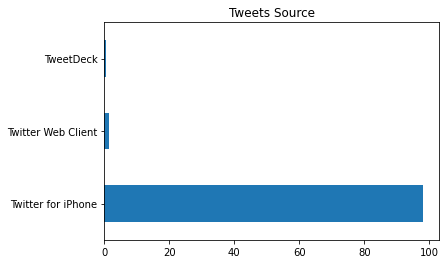

In [421]:
tweets_source.plot(kind="barh", title="Tweets Source");

<h4>Which is the most familiar dog names?</h4> 

In [422]:
tweets_dog_name = twitter_archive_master['dog_name'].value_counts().head() 
tweets_dog_name

Charlie    10
Cooper     10
Lucy       10
Tucker      9
Oliver      9
Name: dog_name, dtype: int64

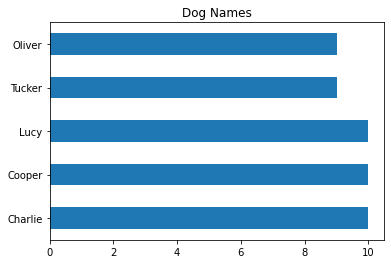

In [423]:
tweets_dog_name.plot(kind="barh", title="Dog Names");

<h4>Which are the most familiar dog types?</h4> 

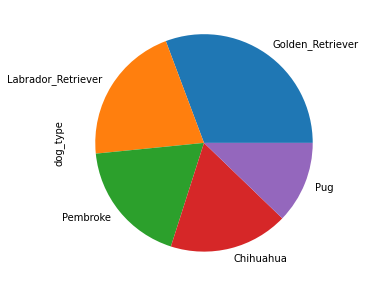

In [424]:
dog_type_data = twitter_archive_master['dog_type'].value_counts().head() / len(twitter_archive_master) * 100
dog_type_data.plot.pie(figsize=(5, 5));

In [425]:
dog_type_data

Golden_Retriever      9.363745
Labrador_Retriever    6.362545
Pembroke              5.642257
Chihuahua             5.402161
Pug                   3.721489
Name: dog_type, dtype: float64

<h4>How many tweets per month in every year? </h4>

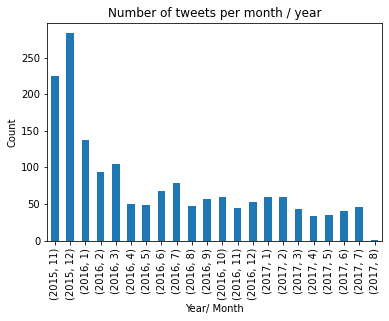

In [426]:
timestamp_month = twitter_archive_master.timestamp.dt.month
timestamp_year = twitter_archive_master.timestamp.dt.year

tweets_per_month_year = twitter_archive_master.groupby([timestamp_year,timestamp_month]).count().iloc[:, 0]


fig, ax = plt.subplots()
tweets_per_month_year.plot(kind='bar',ax=ax)
ax.set(xlabel="Year/ Month", ylabel="Count", title="Number of tweets per month / year");

<h4>Which day of week has the highest tweets?</h4>

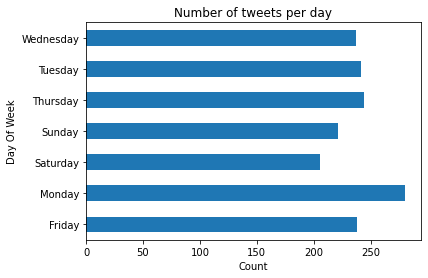

In [427]:
timestamp_day = twitter_archive_master.timestamp.dt.day_name()

tweets_per_day = twitter_archive_master.groupby(timestamp_day).count().iloc[:, 0]

fig, ax = plt.subplots()
tweets_per_day.plot(kind='barh',ax=ax)
ax.set(ylabel="Day Of Week", xlabel="Count", title="Number of tweets per day");

<h4> Tweets Per Hour </h4>

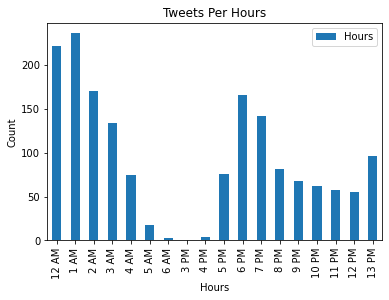

In [428]:
timestamp_hour_org = twitter_archive_master.timestamp.dt.hour
tweets_per_hour = twitter_archive_master.groupby(timestamp_hour_org).count().iloc[:, 0]

dates = []
for i in tweets_per_hour.index:
    if i > 10:
        dates.append(str(i-10)+" PM")
    elif i == 0:
        dates.append("12 AM")
    else:
        dates.append(str(i)+" AM")

tweets_per_hour_data = pd.DataFrame(
    {"Hours":tweets_per_hour.values},
    index=dates)

fig, ax = plt.subplots()
tweets_per_hour_data.plot(kind='bar',ax=ax)
ax.set(xlabel="Hours", ylabel="Count",title="Tweets Per Hours");

<h4>What is the most common dog breed?</h4>

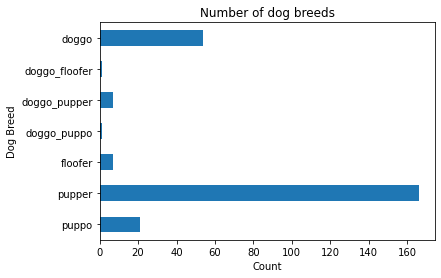

In [429]:
dog_breed = twitter_archive_master.groupby('dog_breed').count().iloc[::-1, 0]

fig, ax = plt.subplots()
dog_breed.plot(kind='barh',ax=ax)
ax.set(ylabel="Dog Breed", xlabel="Count", title="Number of dog breeds");

<h4>What is the highest rating for each dog breed?</h4>

In [430]:
puppo_highest_rating = twitter_archive_master[twitter_archive_master.dog_breed == 'puppo'].final_rating.max()
pupper_highest_rating = twitter_archive_master[twitter_archive_master.dog_breed == 'pupper'].final_rating.max()
floofer_highest_rating = twitter_archive_master[twitter_archive_master.dog_breed == 'floofer'].final_rating.max()
doggo_highest_rating = twitter_archive_master[twitter_archive_master.dog_breed == 'doggo'].final_rating.max()

doggo_puppo_highest_rating = twitter_archive_master[twitter_archive_master.dog_breed == 'doggo_puppo'].final_rating.max()
doggo_pupper_highest_rating = twitter_archive_master[twitter_archive_master.dog_breed == 'doggo_pupper'].final_rating.max()
doggo_floofer_highest_rating = twitter_archive_master[twitter_archive_master.dog_breed == 'doggo_floofer'].final_rating.max()

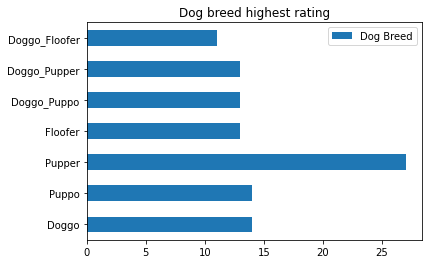

In [431]:
dog_breed_data = pd.DataFrame(
    {"Dog Breed": [doggo_highest_rating, puppo_highest_rating, pupper_highest_rating, floofer_highest_rating,
                   doggo_puppo_highest_rating, doggo_pupper_highest_rating, doggo_floofer_highest_rating]}, 
    index=["Doggo", "Puppo", "Pupper", "Floofer", "Doggo_Puppo", "Doggo_Pupper", "Doggo_Floofer"])
dog_breed_data.plot(kind="barh", title="Dog breed highest rating");

<h4>The highest confidence rate</h4>

In [432]:
max_confidence_rate = twitter_archive_master.confidence_rate.max()
max_confidence_rate

0.999956

<h4>The average confidence rate for each dog breed</h4>

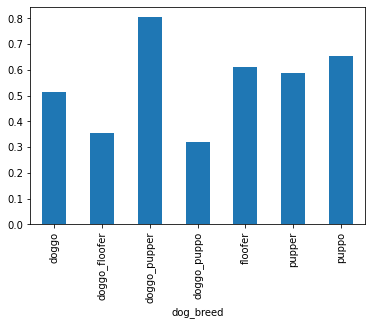

In [433]:
dog_breed_confidence_rate = twitter_archive_master.groupby('dog_breed').confidence_rate.mean()
dog_breed_confidence_rate.plot(kind='bar');

In [434]:
twitter_archive_master[twitter_archive_master.confidence_rate == max_confidence_rate]

,tweet_id,timestamp,source,text,dog_name,tweet_url,final_rating,dog_breed,favorite_count,retweet_count,followers_count,image_url,confidence_rate,dog_type
1945,668636665813057536,2015-11-23 03:46:18,Twitter for iPhone,This is an Irish Rigatoni terrier named Berta....,NaN,https://t.co/EM5fDykrJg,10.0,NaN,966.0,458.0,8931101.0,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,0.999956,Komondor


<h4>What is the highest number of retweets and for which dog type?</h4>

In [435]:
max_retweet_count = twitter_archive_master.retweet_count.max()
max_retweet_count

75111.0

<h4>Highest Number Of Retweets Per Dog Type</h4>

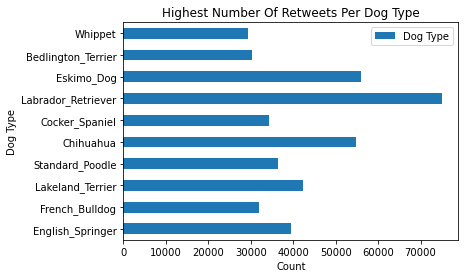

In [364]:
max_retweet = twitter_archive_master.retweet_count.sort_values(ascending=False).head(10)

max_retweet_dog_type = twitter_archive_master[twitter_archive_master.retweet_count.isin(max_retweet.values)].loc[:,['retweet_count','dog_type']]

count_tweets_data = pd.DataFrame(
    {"Dog Type": max_retweet_dog_type.retweet_count.values},
    index=max_retweet_dog_type.dog_type.values)

fig, ax = plt.subplots()
count_tweets_data.plot(kind='barh',ax=ax)
ax.set(xlabel="Count", ylabel="Dog Type",title="Highest Number Of Retweets Per Dog Type");

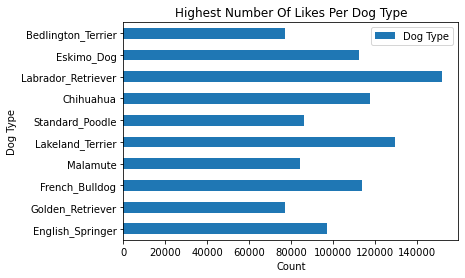

In [366]:
max_likes = twitter_archive_master.favorite_count.sort_values(ascending=False).head(10)

max_likes_dog_type = twitter_archive_master[twitter_archive_master.favorite_count.isin(max_likes.values)].loc[:,['favorite_count','dog_type']]

count_tweets_data = pd.DataFrame(
    {"Dog Type": max_likes_dog_type.favorite_count.values},
    index=max_likes_dog_type.dog_type.values)

fig, ax = plt.subplots()
count_tweets_data.plot(kind='barh',ax=ax)
ax.set(xlabel="Count", ylabel="Dog Type",title="Highest Number Of Likes Per Dog Type");

In [94]:
twitter_archive_master[twitter_archive_master.retweet_count == max_retweet_count].dog_type

823    Labrador_Retriever
Name: dog_type, dtype: object

<h4>What is the highest number of favorite_count and for which dog type?</h4>

In [95]:
max_favorite_count = twitter_archive_master.favorite_count.max()
max_favorite_count

152012.0

In [96]:
twitter_archive_master[twitter_archive_master.favorite_count == max_favorite_count].dog_type

823    Labrador_Retriever
Name: dog_type, dtype: object

<h4>What is the relation between retweets and likes for each dog breed ?</h4>

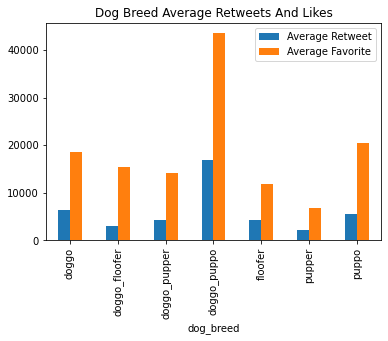

In [142]:
avg_retweet_count_dog_stage = twitter_archive_master.groupby('dog_breed').retweet_count.mean()
avg_favorite_count_dog_stage = twitter_archive_master.groupby('dog_breed').favorite_count.mean()

dog_breed_data = pd.DataFrame(
    {"Average Retweet": avg_retweet_count_dog_stage.values,
    "Average Favorite": avg_favorite_count_dog_stage.values},
    index=avg_favorite_count_dog_stage.index)

dog_breed_data.plot(kind="bar", title="Dog Breed Average Retweets And Likes");

<h5>11) What is the relation between number of likes and retweets</h5>

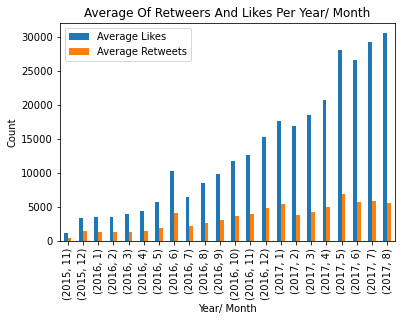

In [216]:
timestamp_year = twitter_archive_master.timestamp.dt.year
timestamp_month = twitter_archive_master.timestamp.dt.month

favorite_count_per_year = twitter_archive_master.groupby([timestamp_year,timestamp_month]).favorite_count.mean()
retweet_count_per_year = twitter_archive_master.groupby([timestamp_year,timestamp_month]).retweet_count.mean()

count_tweets_data = pd.DataFrame(
    {"Average Likes": favorite_count_per_year.values,
    "Average Retweets": retweet_count_per_year.values},
    index=retweet_count_per_year.index)


fig, ax = plt.subplots()
count_tweets_data.plot(kind='bar',ax=ax)
ax.set(xlabel="Year/ Month", ylabel="Count", title="Average Of Retweers And Likes Per Year/ Month");

<h4>The Highests Average Dog Types Retweets </h4>

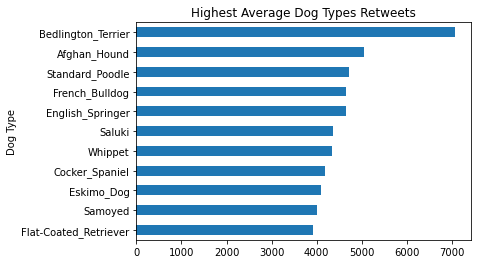

In [243]:
tweets_dog_type_retweets = twitter_archive_master.groupby(['dog_type']).retweet_count.mean().sort_values(ascending=False)[10::-1]
fig, ax = plt.subplots()
tweets_dog_type_retweets.plot(kind='barh',ax=ax)
ax.set(title="Highest Average Dog Types Retweets", ylabel="Dog Type");

<h4>The Highests Average Dog Types Likes </h4>

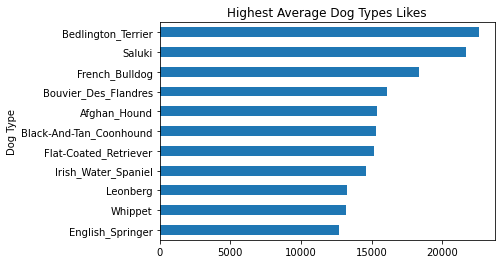

In [242]:
tweets_dog_type_likes = twitter_archive_master.groupby(['dog_type']).favorite_count.mean().sort_values(ascending=False)[10::-1]
fig, ax = plt.subplots()
tweets_dog_type_likes.plot(kind='barh',ax=ax)
ax.set(title="Highest Average Dog Types Likes", ylabel="Dog Type");